# Event-wsie Energy Deposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cosmic Background

In [2]:
cosmicFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/CosmicEvt.csv'
cosmic = pd.read_csv( cosmicFile )

### Number of events with cosmic and cosmic-induced particles traversing the LArTPC

In [3]:
cosmic

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
0,0,176,9.760835,1.680886,3.646694,442.413204,82.036783
1,0,347,2.636766,0.374059,0.320674,0.000000,0.000000
2,0,353,32.595050,11.534848,62.138252,481.296845,91.481790
3,0,431,0.129662,0.055576,0.014481,0.000000,0.000000
4,0,432,47.556056,21.860686,87.354959,0.000000,0.000000
...,...,...,...,...,...,...,...
10644,999,553,0.423458,0.128810,0.061458,0.000000,0.000000
10645,999,599,21.291526,8.724974,37.259666,530.451630,93.855159
10646,999,653,13.024254,3.541608,17.652898,358.641699,70.588693
10647,999,718,0.260888,0.095222,0.036780,0.000000,0.000000


10649 out of 1M cosmogenic events have energy deposition in the LArTPC.  1.1%

### Number of events with at least a muon

In [4]:
cosmic[cosmic.muLength>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
0,0,176,9.760835,1.680886,3.646694,442.413204,82.036783
2,0,353,32.595050,11.534848,62.138252,481.296845,91.481790
9,0,908,21.961343,4.570633,15.770690,562.619984,104.762899
11,1,44,5.521824,2.268951,6.548616,211.480056,74.548370
13,1,54,13.581860,11.091350,41.653649,9.505779,1.935964
...,...,...,...,...,...,...,...
10642,999,213,21.712257,9.100589,30.630400,527.376414,95.474049
10643,999,436,26.526793,7.574550,28.927368,536.018022,96.447048
10645,999,599,21.291526,8.724974,37.259666,530.451630,93.855159
10646,999,653,13.024254,3.541608,17.652898,358.641699,70.588693


5818 events have at least a muon track out of 1M events simulated.  That means 0.58%.

### Number of events with a muon and the muon is shorter than 5cm in the TPC

In [5]:
cosmic[(cosmic.muLength<50)&(cosmic.muLength>0)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
13,1,54,13.581860,11.091350,41.653649,9.505779,1.935964
80,7,455,25.868468,20.892127,84.147526,38.931967,6.743203
125,11,541,2.081658,1.298678,2.903683,10.665289,2.037308
142,13,30,2.089746,1.046254,1.567654,0.571258,0.071038
178,16,701,3.707528,1.421187,1.234005,46.984381,8.652472
...,...,...,...,...,...,...,...
10344,973,564,4.489419,2.834074,6.425805,39.215736,7.388869
10362,975,588,0.992453,0.583149,2.837543,25.399266,4.512309
10369,976,467,2.063347,1.037673,1.479265,33.813682,6.059672
10437,981,338,1.583036,0.625869,0.871592,21.358185,18.895906


We should be able to identify a muon and reject the event if the muon track is longer than 5cm. \
0.0142% of cosmic events have a muon track shorter than 5cm in the LArTPC, and this fraction is negligible.

### Number of events with either no muon or muons shorter than 5cm

In [6]:
cosmic[(cosmic.muLength<50)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
1,0,347,2.636766,0.374059,0.320674,0.0,0.0
3,0,431,0.129662,0.055576,0.014481,0.0,0.0
4,0,432,47.556056,21.860686,87.354959,0.0,0.0
5,0,704,0.043938,0.035870,0.006712,0.0,0.0
6,0,725,1.131896,0.171435,0.098903,0.0,0.0
...,...,...,...,...,...,...,...
10636,998,680,0.082957,0.055108,0.014268,0.0,0.0
10638,998,744,76.396508,23.640684,84.840872,0.0,0.0
10639,998,774,0.107689,0.099727,0.039809,0.0,0.0
10644,999,553,0.423458,0.128810,0.061458,0.0,0.0


In [7]:
cosmic.muLength.max()

631.9860012972993

4973 out of 1M cosmogenic events have either no muons or muons shorter than 5cm.  0.5%

### Muon length in the LArTPC

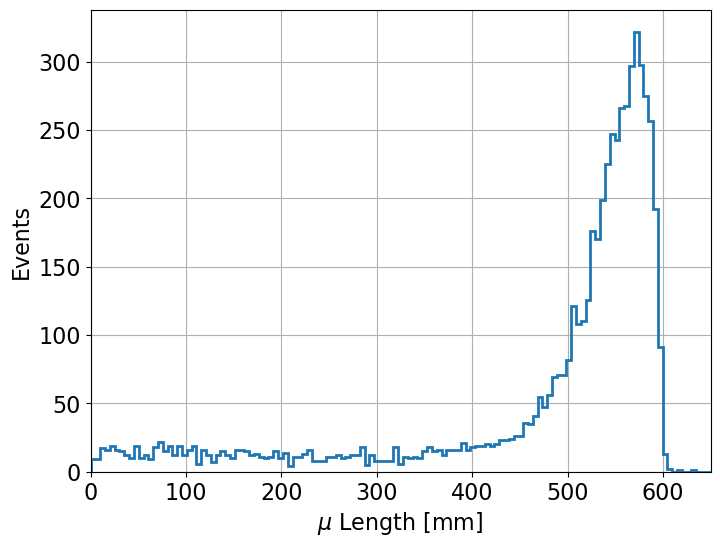

In [9]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[(cosmic.muLength>0)].muLength, bins = np.linspace(0, 650, 130), histtype = 'step', lw = 2)
ax.set_xlabel( r'$\mu$ Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 650])

ax.grid(":")
fig.savefig('CosmicMuonLength.pdf')

### Electron energy deposition in LArTPC

#### All electrons

In [10]:
cosmic[cosmic.eTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
0,0,176,9.760835,1.680886,3.646694,442.413204,82.036783
1,0,347,2.636766,0.374059,0.320674,0.000000,0.000000
2,0,353,32.595050,11.534848,62.138252,481.296845,91.481790
3,0,431,0.129662,0.055576,0.014481,0.000000,0.000000
4,0,432,47.556056,21.860686,87.354959,0.000000,0.000000
...,...,...,...,...,...,...,...
10644,999,553,0.423458,0.128810,0.061458,0.000000,0.000000
10645,999,599,21.291526,8.724974,37.259666,530.451630,93.855159
10646,999,653,13.024254,3.541608,17.652898,358.641699,70.588693
10647,999,718,0.260888,0.095222,0.036780,0.000000,0.000000


In [11]:
cosmic.eMaxE.max()

113.39364442373878

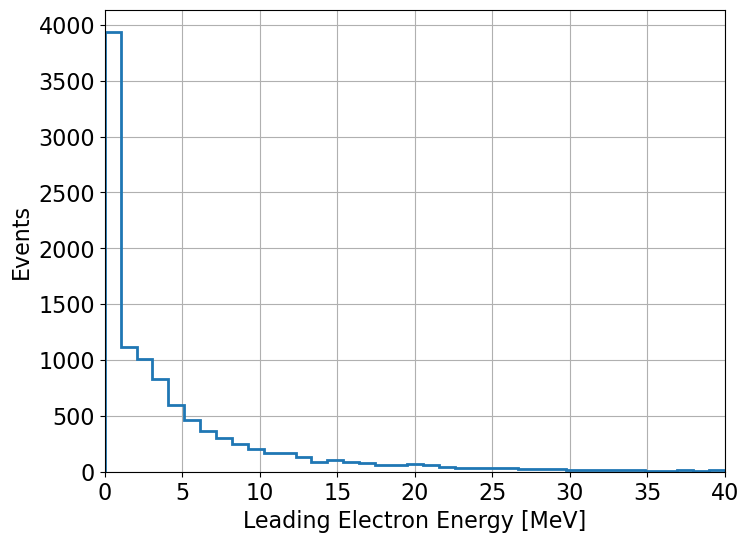

In [12]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic.eMaxE, bins = np.linspace(0, 40, 40), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])

ax.grid(":")
fig.savefig('CosmicAlleMaxE.pdf')

In [13]:
cosmic[cosmic.eMaxE>40.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
29,2,821,94.751003,40.825915,189.949025,584.606070,111.434221
44,4,224,268.818189,64.820332,329.924781,586.312552,112.464739
61,6,232,127.114128,48.586046,194.613091,552.524624,103.149418
179,16,766,145.551118,42.822443,193.897265,485.608497,93.134811
205,18,361,94.739446,46.525045,212.064906,586.659505,110.169585
...,...,...,...,...,...,...,...
10027,942,779,140.332701,43.096019,195.183912,460.260287,87.851461
10063,946,658,69.272837,44.429068,211.140379,541.617052,104.671196
10246,962,750,123.801775,47.736460,202.114916,555.426214,104.792930
10441,981,695,125.668074,40.965531,179.824377,560.225478,105.620072


In [14]:
cosmic[(cosmic.eMaxE>40.)&(cosmic.muLength<50.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
212,19,62,280.171491,67.079385,328.863966,0.606422,0.113303
4838,457,122,421.937239,48.004145,234.844934,0.000000,0.000000
7570,713,746,62.667914,42.218254,199.534840,0.000000,0.000000
9073,856,7,511.111235,54.467365,266.353741,0.000000,0.000000
9081,856,787,97.094916,88.723077,64.077391,0.000000,0.000000


137 cosmic events (out of 1M) have an electron > 40 MeV, while 5 cosmic events (out of 1M) have an electron > 40 MeV but no muons > 5cm

In [16]:
cosmic.eTotalE.max()

2112.3092795251964

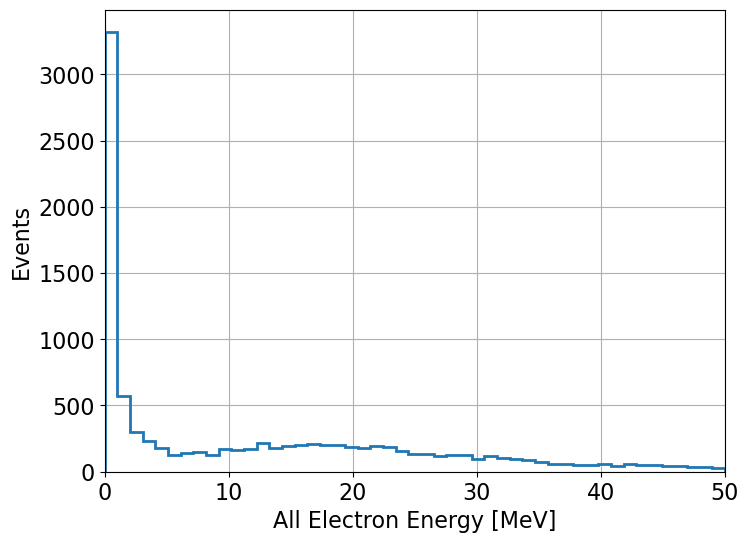

In [18]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic.eTotalE, bins = np.linspace(0, 50, 50), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 50])

ax.grid(":")
fig.savefig('CosmicAlleTotalE.pdf')

In [19]:
cosmic[cosmic.eTotalE>50]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
29,2,821,94.751003,40.825915,189.949025,584.606070,111.434221
44,4,224,268.818189,64.820332,329.924781,586.312552,112.464739
46,4,443,81.210507,14.241125,55.421685,556.537541,108.751563
56,5,610,95.579657,26.643416,86.268978,573.132185,107.422725
61,6,232,127.114128,48.586046,194.613091,552.524624,103.149418
...,...,...,...,...,...,...,...
10549,990,971,54.293993,18.542108,90.199961,533.816917,103.881209
10550,991,56,176.124812,45.956578,211.760419,567.063851,106.268369
10574,993,154,96.357029,39.047710,171.466173,505.043421,95.321557
10576,993,388,50.224808,15.737994,67.805669,566.856605,103.712257


### Events with a muon track > 5cm

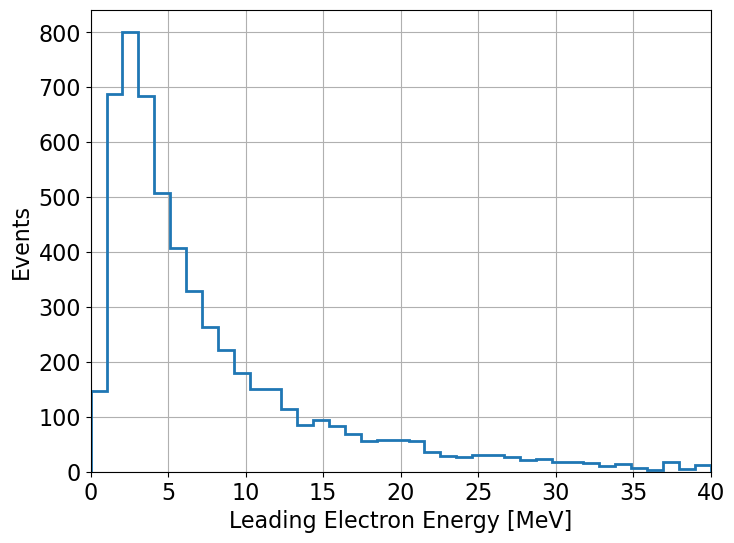

In [20]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[cosmic.muLength>50.].eMaxE, bins = np.linspace(0, 40, 40), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])

ax.grid(":")
fig.savefig('CosmicMuonAndeMaxE.pdf')

In [21]:
cosmic[(cosmic.muLength>50.)&(cosmic.eMaxE>40)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
29,2,821,94.751003,40.825915,189.949025,584.606070,111.434221
44,4,224,268.818189,64.820332,329.924781,586.312552,112.464739
61,6,232,127.114128,48.586046,194.613091,552.524624,103.149418
179,16,766,145.551118,42.822443,193.897265,485.608497,93.134811
205,18,361,94.739446,46.525045,212.064906,586.659505,110.169585
...,...,...,...,...,...,...,...
10027,942,779,140.332701,43.096019,195.183912,460.260287,87.851461
10063,946,658,69.272837,44.429068,211.140379,541.617052,104.671196
10246,962,750,123.801775,47.736460,202.114916,555.426214,104.792930
10441,981,695,125.668074,40.965531,179.824377,560.225478,105.620072


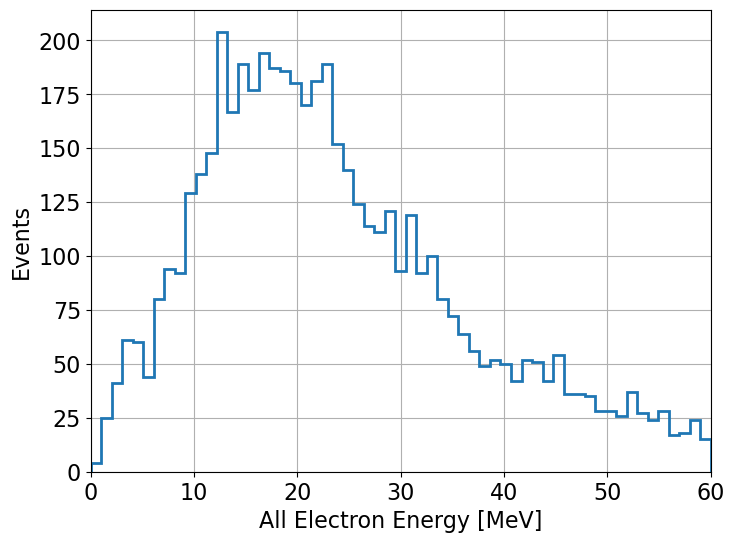

In [22]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[cosmic.muLength>50.].eTotalE, bins = np.linspace(0, 60, 60), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 60])

ax.grid(":")
fig.savefig('CosmicMuonAndeTotalE.pdf')

In [23]:
cosmic[(cosmic.muLength>50.)&(cosmic.eTotalE>60.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
29,2,821,94.751003,40.825915,189.949025,584.606070,111.434221
44,4,224,268.818189,64.820332,329.924781,586.312552,112.464739
46,4,443,81.210507,14.241125,55.421685,556.537541,108.751563
56,5,610,95.579657,26.643416,86.268978,573.132185,107.422725
61,6,232,127.114128,48.586046,194.613091,552.524624,103.149418
...,...,...,...,...,...,...,...
10511,987,581,62.997369,16.364439,64.389773,551.077213,104.554824
10535,989,880,132.132818,19.804660,72.400551,401.827007,74.791528
10539,990,93,73.434861,21.436647,101.203459,590.827481,108.323971
10550,991,56,176.124812,45.956578,211.760419,567.063851,106.268369


### Events without a muon track > 5cm

In [24]:
cosmic[cosmic.muLength<50.].eMaxE.max()

88.72307682803104

In [25]:
cosmic[cosmic.muLength<50.].eTotalE.max()

511.1112345996984

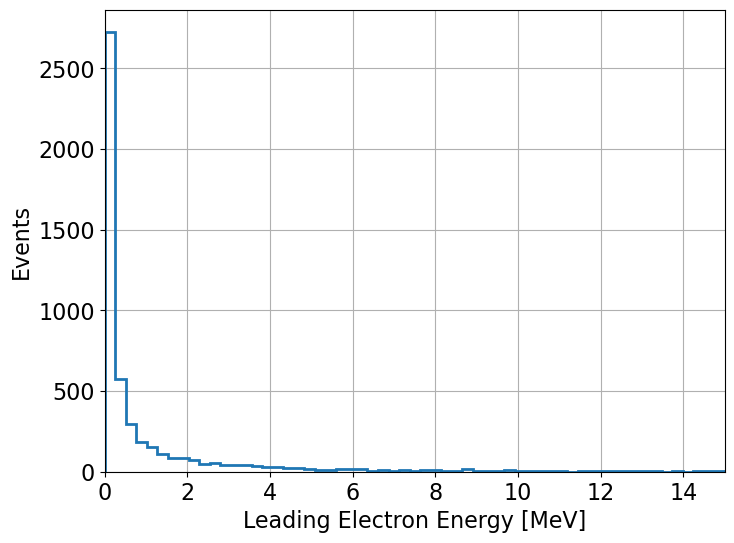

In [26]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[cosmic.muLength<50.].eMaxE, bins = np.linspace(0, 15, 60), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 15])

ax.grid(":")
fig.savefig('CosmicNoMuonAndeMaxE.pdf')

In [27]:
cosmic[(cosmic.muLength<50.)&(cosmic.eMaxE>15.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
4,0,432,47.556056,21.860686,87.354959,0.000000,0.000000
80,7,455,25.868468,20.892127,84.147526,38.931967,6.743203
212,19,62,280.171491,67.079385,328.863966,0.606422,0.113303
561,49,336,45.048283,17.710653,78.385380,0.000000,0.000000
636,56,264,28.517745,16.777537,73.034701,0.000000,0.000000
...,...,...,...,...,...,...,...
10041,944,716,48.848327,15.186523,64.429398,0.000000,0.000000
10263,964,664,30.412909,23.383194,97.926772,0.000000,0.000000
10283,967,278,68.779501,36.352760,163.724000,0.000000,0.000000
10420,980,145,33.699968,23.194344,112.705807,0.000000,0.000000


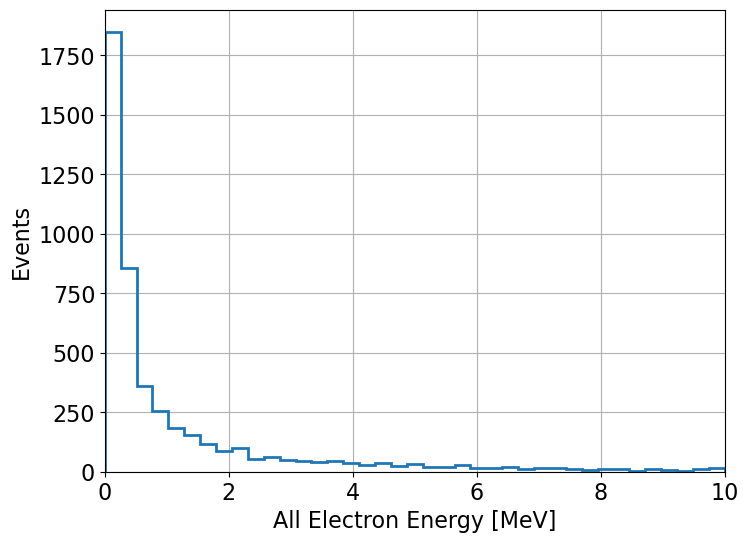

In [28]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[cosmic.muLength<50.].eTotalE, bins = np.linspace(0, 10, 40), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 10])

ax.grid(":")
fig.savefig('CosmicNoMuonAndeTotalE.pdf')

In [29]:
cosmic[(cosmic.muLength<50.)&(cosmic.eTotalE>10.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
4,0,432,47.556056,21.860686,87.354959,0.000000,0.000000
13,1,54,13.581860,11.091350,41.653649,9.505779,1.935964
71,6,902,17.826710,11.772398,44.285855,0.000000,0.000000
80,7,455,25.868468,20.892127,84.147526,38.931967,6.743203
187,17,200,37.735373,10.900440,45.764404,0.000000,0.000000
...,...,...,...,...,...,...,...
10503,986,852,29.773087,5.292006,15.986535,0.000000,0.000000
10581,993,587,18.751785,1.875044,4.357264,20.800450,3.823333
10597,994,687,27.494076,12.026614,123.334555,0.000000,0.000000
10629,998,57,12.080963,7.838637,25.335737,0.000000,0.000000


## $\nu_e$-Ar Charged-Current Interaction

In [30]:
sigFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/nueArCCEvt00.csv'
signal = pd.read_csv( sigFile )

In [31]:
signal

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
0,0,0,0.026611,0.026611,0.003970,0.0,0.0
1,0,1,11.352032,7.877573,39.534964,0.0,0.0
2,0,2,12.747910,4.625278,15.121116,0.0,0.0
3,0,3,33.460557,25.584615,96.611776,0.0,0.0
4,0,4,42.793617,22.751715,87.293392,0.0,0.0
...,...,...,...,...,...,...,...
9990,0,9995,20.313939,15.174591,58.070500,0.0,0.0
9991,0,9996,38.694715,20.543442,83.032543,0.0,0.0
9992,0,9997,25.908030,20.012471,81.890548,0.0,0.0
9993,0,9998,21.041720,14.840890,66.949216,0.0,0.0


In [32]:
signal.eMaxE.max()

40.93852956250901

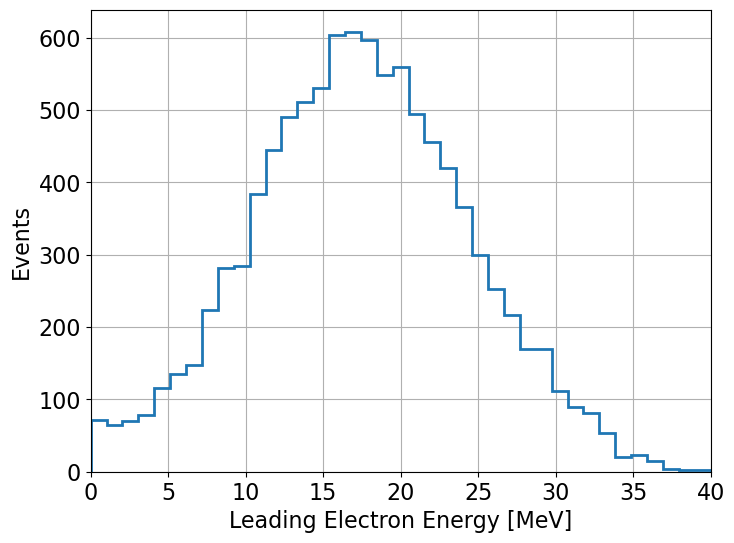

In [33]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(signal.eMaxE, bins = np.linspace(0, 40, 40), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])

ax.grid(":")

In [34]:
signal[signal.eMaxE<1]

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength,muTotalE
0,0,0,0.026611,0.026611,0.003970,0.0,0.0
200,0,200,0.745194,0.335653,0.289176,0.0,0.0
374,0,374,2.406729,0.931891,1.456818,0.0,0.0
380,0,380,0.138649,0.062968,0.018004,0.0,0.0
433,0,433,0.272663,0.272663,1.563205,0.0,0.0
...,...,...,...,...,...,...,...
9225,0,9230,0.108388,0.085540,0.437966,0.0,0.0
9579,0,9584,1.002985,0.316255,0.263667,0.0,0.0
9623,0,9628,2.729654,0.776012,1.321561,0.0,0.0
9813,0,9818,0.395381,0.146871,0.076562,0.0,0.0


In [35]:
signal.eMaxLength.max()

316.0838767891882

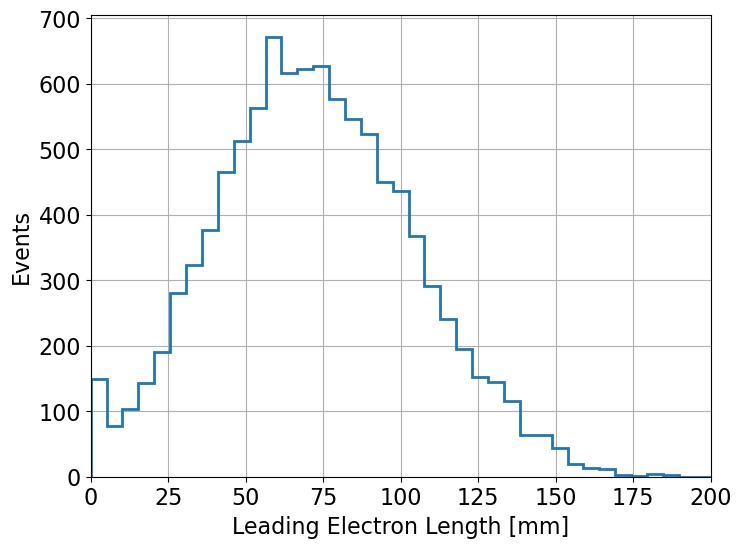

In [37]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(signal.eMaxLength, bins = np.linspace(0, 200, 40), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 200])

ax.grid(":")